# Introduction

In [1]:
import torch

In [2]:
tensor1 = torch.Tensor([[1, 2, 3], 
                       [4, 5, 6]])
tensor2 = torch.Tensor([[7, 8, 9], 
                        [10, 11, 12]])

tensor1.requires_grad_()

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)

In [4]:
output_tensor = tensor1 * tensor2
output_tensor.requires_grad

True

There are still no gradients, but there is a gradient function

In [5]:
output_tensor.grad, output_tensor.grad_fn

(None, <MulBackward0 at 0x1e61c345438>)

In [6]:
tensor1.grad_fn, tensor2.grad_fn

(None, None)

The gradient function only contains the last operation. Here, even though there is a multiplication as well as a mean, only the mean calculation is recorded as the gradient function

In [7]:
output_tensor = (tensor1 * tensor2).mean()
print(output_tensor.grad_fn)

To calculate the gradients, we need to explicitly perform a backward propagation

In [8]:
output_tensor.backward()

Future calls to backward will accumulate gradients into this vector

In [9]:
print(tensor1.grad)

tensor([[1.1667, 1.3333, 1.5000],
        [1.6667, 1.8333, 2.0000]])


In [10]:
def calculate(t):
    return t * 2

@torch.no_grad()
def calculate_with_no_grad(t):
    return t * 2

In [11]:
result_tensor = calculate(tensor1)
result_tensor

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]], grad_fn=<MulBackward0>)

In [12]:
result_tensor_no_grad = calculate_with_no_grad(tensor1)
result_tensor_no_grad

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

# Autograd with variables

In [13]:
import torch 
from torch.autograd import Variable

var = Variable(torch.FloatTensor([9]))
var

tensor([9.])

In [14]:
w1 = Variable(torch.FloatTensor([3]), requires_grad = True)
w2 = Variable(torch.FloatTensor([7]), requires_grad = True)
result_var = var * w1
result_var 

tensor([27.], grad_fn=<MulBackward0>)

# Training a linear model

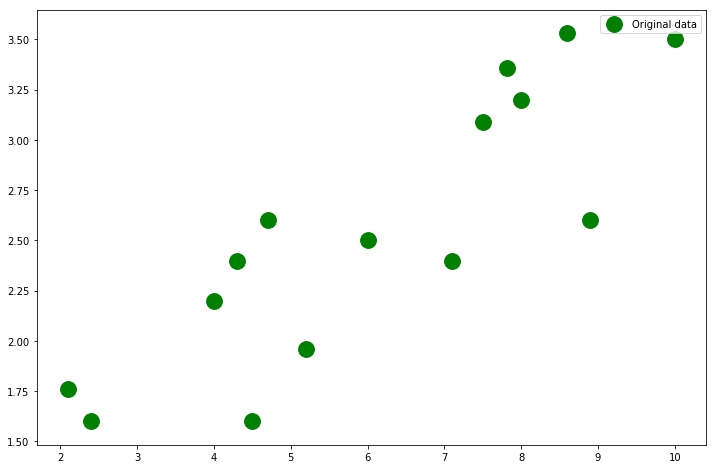

In [16]:
import numpy as np 
import matplotlib.pyplot as plt

x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], 
                     [8.9], [5.2], [8.59], [2.1], [8] , 
                     [10], [4.5], [6], [4]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], 
                     [2.6], [1.96], [3.53], [1.76], [3.2] , 
                     [3.5], [1.6], [2.5], [2.2]], 
                    dtype = np.float32)

plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, label='Original data', s=250, c='g')
plt.legend()
plt.show()

In [17]:
import torch 

X_train = torch.from_numpy(x_train) 
Y_train = torch.from_numpy(y_train)

Input, output and hidden layer sizes plus the learning rate

In [18]:
input_size = 1 
hidden_size = 1
output_size = 1

w1 = torch.rand(input_size, 
                hidden_size,         
                requires_grad=True)
w1.shape

torch.Size([1, 1])

In [19]:
w2 = torch.rand(hidden_size, 
                output_size,    
                requires_grad=True)
w2.shape

torch.Size([1, 1])

## Training

#### Foward Pass:
* Predicting Y with input data X
* finding (matrix X matrix) using .mm function, finding product of X_train and w1 and activation function is identity function
* again doing mat product data with second weight w2

#### Finding Loss:
* Finding difference between Y_train and Y_pred by squaring the difference and then summing out, similar to nn.MSELoss 


#### For the loss_backward() function call:
* backward pass will compute the gradient of loss with respect to all Tensors with requires_grad=True. 
* After this call w1.grad and w2.grad will be Tensors holding the gradient of the loss with respect to w1 and w2 respectively.

#### Manually updating the weights
* weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
* reducing weight with multiple of learning rate and gradient
* manually zero the weight gradients after updating weights

In [20]:
learning_rate = 1e-6

# Start at 10. Change this to 100, 1000 and 3000 and run the code all the way to the plot at the bottom
for iter in range(1, 10):
    
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 50 ==0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()
        
print ('w1: ', w1)
print ('w2: ', w2)

w1:  tensor([[0.4990]], requires_grad=True)
w2:  tensor([[0.6679]], requires_grad=True)


In [21]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [22]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.5665],
        [0.7999],
        [2.4997],
        [2.3663],
        [1.4331],
        [2.6050],
        [2.9663],
        [1.7331],
        [2.8629],
        [0.6999],
        [2.6663],
        [3.3329],
        [1.4998],
        [1.9997],
        [1.3332]], grad_fn=<MmBackward>)

In [23]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.5664531 ],
       [0.799891  ],
       [2.4996593 ],
       [2.3663442 ],
       [1.433138  ],
       [2.6049783 ],
       [2.966262  ],
       [1.733097  ],
       [2.862943  ],
       [0.69990456],
       [2.6663032 ],
       [3.3328788 ],
       [1.4997956 ],
       [1.9997275 ],
       [1.3331516 ]], dtype=float32)

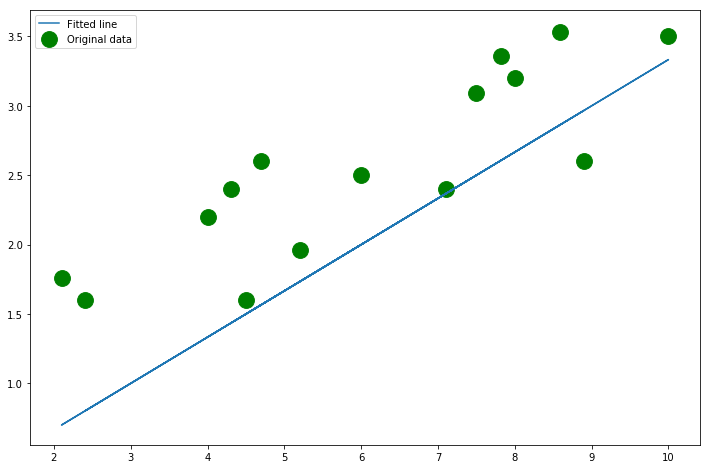

In [24]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, label = 'Original data', s=250, c='g') 
plt.plot(x_train, predicted, label = 'Fitted line ')
plt.legend() 
plt.show()